In [35]:
ls

 Volume in drive C is Acer
 Volume Serial Number is A052-F2EB

 Directory of c:\Users\Sivaraj\Downloads\Traffic_Sign_Recongnition-main\Traffic_Sign_Recongnition-main\data

13-09-2024  17:31    <DIR>          .
13-09-2024  17:20    <DIR>          ..
27-08-2024  07:22    <DIR>          Meta
26-08-2024  23:48             1,033 Meta.csv
27-08-2024  07:22    <DIR>          Test
26-08-2024  23:48           427,897 Test.csv
26-08-2024  23:44            14,932 Traffic_Sign_Recongnition.ipynb
27-08-2024  07:24    <DIR>          Train
27-08-2024  00:15         1,940,896 Train.csv
               4 File(s)      2,384,758 bytes
               5 Dir(s)  76,650,426,368 bytes free


In [36]:
cd c:\Users\Sivaraj\Downloads\Traffic_Sign_Recongnition-main\Traffic_Sign_Recongnition-main

c:\Users\Sivaraj\Downloads\Traffic_Sign_Recongnition-main\Traffic_Sign_Recongnition-main


c:\Users\Sivaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [37]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D


# Function to load and preprocess images
def load_images_from_directory(path, image_size=(30, 30)):
    images = os.listdir(path)
    data = []
    labels = []
    class_id = int(path.split('\\')[-1])

    for image_filename in images:
        try:
            image = Image.open(os.path.join(path, image_filename))
            image = image.resize(image_size)
            image = np.array(image)
            data.append(image)
            labels.append(class_id)
        except:
            print(f"Error loading image: {os.path.join(path, image_filename)}")

    return data, labels

# Retrieving the images and their labels
data = []
labels = []
num_classes = 43
current_path = os.getcwd()

for class_id in range(num_classes):
    path = os.path.join(current_path, 'data\\Train', str(class_id))
    class_data, class_labels = load_images_from_directory(path)
    data.extend(class_data)
    labels.extend(class_labels)

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

# Replace the Flatten layer with GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())

# Optionally, you can add more Dense layers with BatchNormalization and Dropout
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

# Make sure num_classes is defined properly for your specific problem
model.add(Dense(num_classes, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=epochs, validation_data=(X_test, y_test_one_hot))
model.save("model.h5")


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


c:\Users\Sivaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.3294 - loss: 2.7206 - val_accuracy: 0.9324 - val_loss: 0.2560
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8973 - loss: 0.3439 - val_accuracy: 0.9533 - val_loss: 0.1461
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9438 - loss: 0.1868 - val_accuracy: 0.9864 - val_loss: 0.0521
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9580 - loss: 0.1411 - val_accuracy: 0.9899 - val_loss: 0.0319
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9710 - loss: 0.0964 - val_accuracy: 0.9693 - val_loss: 0.0971
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9699 - loss: 0.0966 - val_accuracy: 0.9949 - val_loss: 0.0170
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9747 - loss: 0.0809 - val_accuracy: 0.9786 - val_loss: 0.0675
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9794 - loss: 0.0646 - 

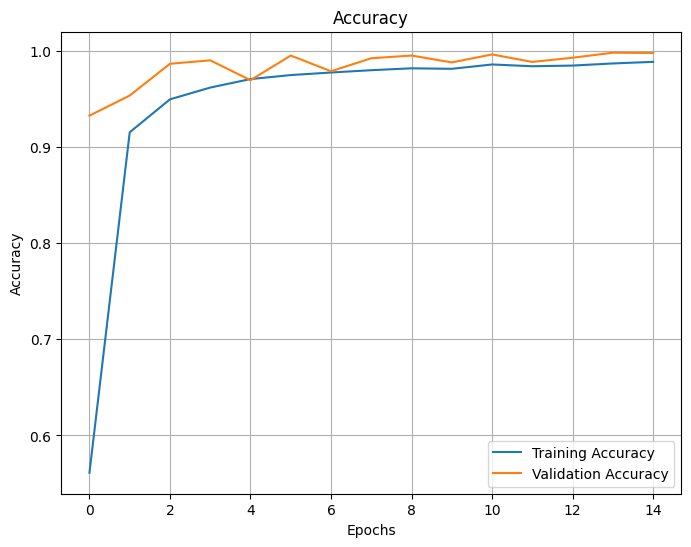

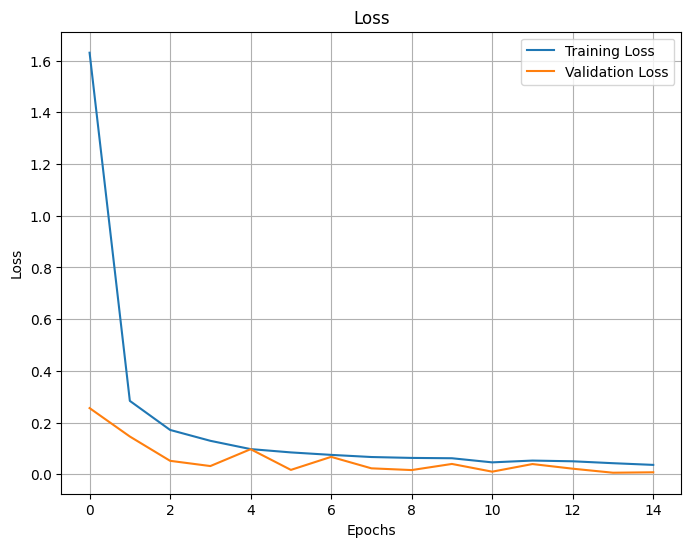

In [38]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting graphs for accuracy and loss
plot_accuracy(history)
plot_loss(history)


In [39]:
ls

 Volume in drive C is Acer
 Volume Serial Number is A052-F2EB

 Directory of c:\Users\Sivaraj\Downloads\Traffic_Sign_Recongnition-main\Traffic_Sign_Recongnition-main

13-09-2024  17:20    <DIR>          .
23-08-2024  21:25    <DIR>          ..
25-08-2024  15:52    <DIR>          .ipynb_checkpoints
13-09-2024  17:05            84,263 captured_image.jpg
13-09-2024  17:31    <DIR>          data
13-09-2024  17:04             5,271 GUI_Traffic_Sign_Classification.py
13-09-2024  18:03         1,427,896 model.h5
23-08-2024  21:25             1,550 README.md
13-09-2024  18:04           102,181 Traffic_Sign_Recongnition.ipynb
               5 File(s)      1,621,161 bytes
               4 Dir(s)  75,000,610,816 bytes free


In [40]:
cd data

c:\Users\Sivaraj\Downloads\Traffic_Sign_Recongnition-main\Traffic_Sign_Recongnition-main\data


c:\Users\Sivaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [41]:
ls

 Volume in drive C is Acer
 Volume Serial Number is A052-F2EB

 Directory of c:\Users\Sivaraj\Downloads\Traffic_Sign_Recongnition-main\Traffic_Sign_Recongnition-main\data

13-09-2024  17:31    <DIR>          .
13-09-2024  17:20    <DIR>          ..
27-08-2024  07:22    <DIR>          Meta
26-08-2024  23:48             1,033 Meta.csv
27-08-2024  07:22    <DIR>          Test
26-08-2024  23:48           427,897 Test.csv
26-08-2024  23:44            14,932 Traffic_Sign_Recongnition.ipynb
27-08-2024  07:24    <DIR>          Train
27-08-2024  00:15         1,940,896 Train.csv
               4 File(s)      2,384,758 bytes
               5 Dir(s)  75,000,659,968 bytes free


In [42]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import os
import pandas as pd
from PIL import Image
import numpy as np

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open(''+img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

# Make predictions on the test data
pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save('traffic_classifier_model.h5')

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


0.9785431512272368


### Data set link
https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign